# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#capitalize the cities
cities = [c.title() for c in cities]
        
# Print the city count to confirm sufficient count
print (len(cities))


615


In [3]:
#display the list of cities
print (cities)

['Hunza', 'Akureyri', 'Ushuaia', 'Kapaa', 'Dikson', 'Chokurdakh', 'Sao Filipe', 'Castro', 'Great Yarmouth', 'Saint-Philippe', 'Hilo', 'Port Moresby', 'Carnarvon', 'Nikolskoye', 'Sentyabrskiy', 'Hobyo', 'Illoqqortoormiut', 'Rikitea', 'Vaini', 'Capoterra', 'Vanimo', 'Voznesenye', 'Bluff', 'Hokitika', 'Hermanus', 'Puerto Ayora', 'Palora', 'Lavrentiya', 'Huescar', 'Ussuriysk', 'Port Alfred', 'Zalantun', 'Saint-Pierre', 'Bethel', 'Barrow', 'Mar Del Plata', 'Tabuleiro Do Norte', 'Lebu', 'Elverum', 'Bredasdorp', 'Skala Fourkas', 'Valleyview', 'Khonuu', 'Naze', 'Victoria', 'Alihe', 'Samusu', 'Padilla', 'Attawapiskat', 'Tommot', 'Khatanga', 'Cape Town', 'Kodiak', 'Huaicheng', 'Nizhneyansk', 'Kalmunai', 'Lyubim', 'Mataura', 'Tasiilaq', 'Darnah', 'Kudahuvadhoo', 'Tomatlan', 'Punta Arenas', 'Adrar', 'Palabuhanratu', 'Kaitangata', 'Taolanaro', 'Acarau', 'Akyab', 'Lodja', 'Airai', 'Weymouth', 'Velagici', 'Imeni Poliny Osipenko', 'Muros', 'Port Hueneme', 'Iqaluit', 'Clyde River', 'Kirovskiy', 'Mayo',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create lists for the desired information
country=[]
lat = []
lon = []
temp = []
humidity = []
wind = []
cloud = []
date=[]


i=0
#request information from the api
for city in cities:
    response = requests.get(query_url + city).json()
    i=i+1
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        print(f"{city} Complete - {i} of {len(cities)}")
        time.sleep(1)
        
    except (KeyError, IndexError):
        print(f"Data Missing for {city}----skipping----{i} of {len(cities)}")
        country.append(None)
        lat.append(None)
        lon.append(None)
        temp.append(None)
        humidity.append(None)
        wind.append(None)
        cloud.append(None)
        date.append(None)

        
#track the number of calls and responses        
    if i == len(cities):
        print(f"*******API REQUEST Complete*******") 
    

Data Missing for Hunza----skipping----1 of 615
Akureyri Complete - 2 of 615
Ushuaia Complete - 3 of 615
Kapaa Complete - 4 of 615
Dikson Complete - 5 of 615
Chokurdakh Complete - 6 of 615
Sao Filipe Complete - 7 of 615
Castro Complete - 8 of 615
Great Yarmouth Complete - 9 of 615
Saint-Philippe Complete - 10 of 615
Hilo Complete - 11 of 615
Port Moresby Complete - 12 of 615
Carnarvon Complete - 13 of 615
Nikolskoye Complete - 14 of 615
Data Missing for Sentyabrskiy----skipping----15 of 615
Hobyo Complete - 16 of 615
Data Missing for Illoqqortoormiut----skipping----17 of 615
Rikitea Complete - 18 of 615
Vaini Complete - 19 of 615
Capoterra Complete - 20 of 615
Vanimo Complete - 21 of 615
Voznesenye Complete - 22 of 615
Bluff Complete - 23 of 615
Hokitika Complete - 24 of 615
Hermanus Complete - 25 of 615
Puerto Ayora Complete - 26 of 615
Palora Complete - 27 of 615
Lavrentiya Complete - 28 of 615
Huescar Complete - 29 of 615
Ussuriysk Complete - 30 of 615
Port Alfred Complete - 31 of 61

Data Missing for Dien Bien----skipping----249 of 615
Sur Complete - 250 of 615
Data Missing for Ondorhaan----skipping----251 of 615
Rio Grande Complete - 252 of 615
Wahpeton Complete - 253 of 615
Vic Complete - 254 of 615
Aginskoye Complete - 255 of 615
Lucapa Complete - 256 of 615
Viedma Complete - 257 of 615
Kawalu Complete - 258 of 615
Sisimiut Complete - 259 of 615
Dangriga Complete - 260 of 615
Diffa Complete - 261 of 615
Edgewater Complete - 262 of 615
Verkhnyaya Tura Complete - 263 of 615
Mapiri Complete - 264 of 615
Werda Complete - 265 of 615
Half Moon Bay Complete - 266 of 615
Navolato Complete - 267 of 615
Ulladulla Complete - 268 of 615
Souillac Complete - 269 of 615
Vostok Complete - 270 of 615
Data Missing for Marcona----skipping----271 of 615
Data Missing for Mrirt----skipping----272 of 615
Dhidhdhoo Complete - 273 of 615
Morehead Complete - 274 of 615
Chany Complete - 275 of 615
Alofi Complete - 276 of 615
Mahebourg Complete - 277 of 615
Port Elizabeth Complete - 278 of

Dong Xoai Complete - 502 of 615
Goderich Complete - 503 of 615
Carballo Complete - 504 of 615
Kendari Complete - 505 of 615
Bundaberg Complete - 506 of 615
Henties Bay Complete - 507 of 615
Olinda Complete - 508 of 615
Lasa Complete - 509 of 615
Teahupoo Complete - 510 of 615
Data Missing for Sedelnikovo----skipping----511 of 615
Raudeberg Complete - 512 of 615
Opuwo Complete - 513 of 615
Taltal Complete - 514 of 615
Data Missing for Kamenskoye----skipping----515 of 615
Tiznit Complete - 516 of 615
Sungairaya Complete - 517 of 615
Shitanjing Complete - 518 of 615
Acajutla Complete - 519 of 615
Nishihara Complete - 520 of 615
Lazaro Cardenas Complete - 521 of 615
Kargasok Complete - 522 of 615
Mumford Complete - 523 of 615
Verkhnyaya Toyma Complete - 524 of 615
Skibbereen Complete - 525 of 615
Paris Complete - 526 of 615
San Quintin Complete - 527 of 615
Cowra Complete - 528 of 615
Rabo De Peixe Complete - 529 of 615
Nabire Complete - 530 of 615
Aklavik Complete - 531 of 615
Itamaraju C

In [5]:
#create a dictionary from all the gathered lists
city_dict = {
    "City": cities,
    "Country": country,
    "Lat": lat,
    "Lon": lon,
    "Temp": temp,
    "Humidity": humidity,
    "Wind_Speed": wind,
    "Cloudiness": cloud,
    "Date (UTC)": date
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a dataframe from the dictionary
city_df = pd.DataFrame(city_dict)

city_df.head(30)

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
0,Hunza,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akureyri,IS,65.68,-18.09,8.60,84.0,5.82,58.0,1.583363e+09
2,Ushuaia,AR,-54.80,-68.30,55.40,76.0,3.87,40.0,1.583363e+09
3,Kapaa,US,22.08,-159.32,78.69,69.0,12.75,40.0,1.583363e+09
4,Dikson,RU,73.51,80.55,-12.30,96.0,17.22,100.0,1.583363e+09
5,Chokurdakh,RU,70.63,147.92,-10.53,80.0,2.57,0.0,1.583363e+09
6,Sao Filipe,CV,14.90,-24.50,73.54,66.0,15.99,0.0,1.583363e+09
7,Castro,BR,-24.79,-50.01,62.73,70.0,3.04,34.0,1.583363e+09
8,Great Yarmouth,GB,52.61,1.73,40.60,93.0,5.82,100.0,1.583363e+09
9,Saint-Philippe,RE,-21.36,55.77,75.45,94.0,5.82,90.0,1.583363e+09


In [7]:
#clean up the dataframe- verify datatypes
city_df.dtypes


City           object
Country        object
Lat           float64
Lon           float64
Temp          float64
Humidity      float64
Wind_Speed    float64
Cloudiness    float64
Date (UTC)    float64
dtype: object

In [15]:
#drop "na" values
city_df = city_df.dropna(how='any', axis=0)

#convert the unix timestamp
city_df['Date (UTC)'] = pd.to_datetime(city_df['Date (UTC)'],unit='s')

#verify number of complete data sets
print (f"{len(city_df.index)} complete sets of city data.")
city_df.head(30)

564 complete sets of city data.


,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
1,Akureyri,IS,65.68,-18.09,8.60,84.0,5.82,58.0,2020-03-04 22:59:20
2,Ushuaia,AR,-54.80,-68.30,55.40,76.0,3.87,40.0,2020-03-04 22:59:21
3,Kapaa,US,22.08,-159.32,78.69,69.0,12.75,40.0,2020-03-04 22:59:22
4,Dikson,RU,73.51,80.55,-12.30,96.0,17.22,100.0,2020-03-04 22:59:23
5,Chokurdakh,RU,70.63,147.92,-10.53,80.0,2.57,0.0,2020-03-04 22:59:24
6,Sao Filipe,CV,14.90,-24.50,73.54,66.0,15.99,0.0,2020-03-04 22:59:25
7,Castro,BR,-24.79,-50.01,62.73,70.0,3.04,34.0,2020-03-04 22:59:26
8,Great Yarmouth,GB,52.61,1.73,40.60,93.0,5.82,100.0,2020-03-04 22:59:27
9,Saint-Philippe,RE,-21.36,55.77,75.45,94.0,5.82,90.0,2020-03-04 22:59:29
10,Hilo,US,19.73,-155.09,72.00,65.0,13.87,90.0,2020-03-04 22:58:31


In [16]:
#export dataframe to csv with option to drop the index
city_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
today = date.today()
tme = today.strftime("%d/%m/%Y")

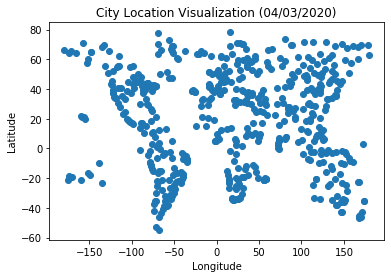

In [18]:
#plot to visualize the lat and lon of each city
plt.scatter(city_df["Lon"], city_df["Lat"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"City Location Visualization ({tme})")
plt.show()

#### Latitude vs. Temperature Plot

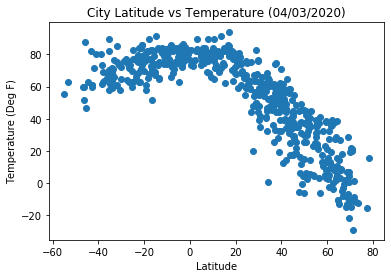

In [19]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Temp"])
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg F)')
plt.title(f"City Latitude vs Temperature ({tme})")
plt.savefig('World_Latitude_vs_Temperature.png')
plt.show()

This plot shows that temperature decreases as you move further from the equator. The Southern Hemisphere is currently in summer, so the slop is not as high as the Northern Hemisphere.

#### Latitude vs. Humidity Plot

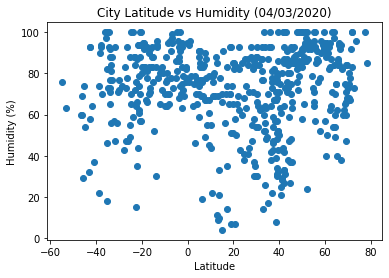

In [20]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({tme})")
plt.savefig('World_Latitude_vs_Humidity.png')
plt.show()


There is no relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

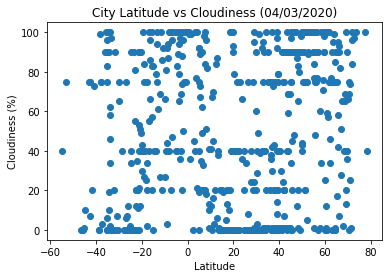

In [21]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({tme})")
plt.savefig('World_Latitude_vs_Cloudiness.png')
plt.show()


There is no relationship between latitude and cloudiness.

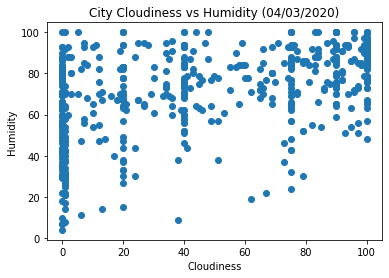

In [22]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Cloudiness"], city_df["Humidity"])
plt.xlabel('Cloudiness')
plt.ylabel('Humidity')
plt.title(f"City Cloudiness vs Humidity ({tme})")
plt.savefig('World_Cloudiness_vs_Humidity.png')
plt.show()

#### Latitude vs. Wind Speed Plot

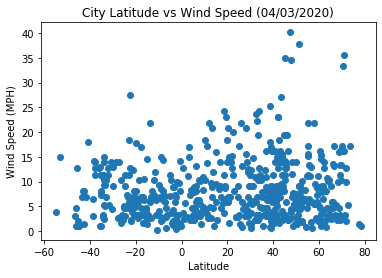

In [23]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Wind_Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"City Latitude vs Wind Speed ({tme})")
plt.savefig('World_Latitude_vs_Wind.png')
plt.show()


There is no relationship between wind speed and latitude.

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df["Lat"]>0]
north_df.head()

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
1,Akureyri,IS,65.68,-18.09,8.60,84.0,5.82,58.0,2020-03-04 22:59:20
3,Kapaa,US,22.08,-159.32,78.69,69.0,12.75,40.0,2020-03-04 22:59:22
4,Dikson,RU,73.51,80.55,-12.30,96.0,17.22,100.0,2020-03-04 22:59:23
5,Chokurdakh,RU,70.63,147.92,-10.53,80.0,2.57,0.0,2020-03-04 22:59:24
6,Sao Filipe,CV,14.90,-24.50,73.54,66.0,15.99,0.0,2020-03-04 22:59:25


In [26]:
south_df = city_df[city_df["Lat"]<0]
south_df.head()

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
2,Ushuaia,AR,-54.80,-68.30,55.40,76.0,3.87,40.0,2020-03-04 22:59:21
7,Castro,BR,-24.79,-50.01,62.73,70.0,3.04,34.0,2020-03-04 22:59:26
9,Saint-Philippe,RE,-21.36,55.77,75.45,94.0,5.82,90.0,2020-03-04 22:59:29
11,Port Moresby,PG,-9.44,147.18,80.60,88.0,6.93,40.0,2020-03-04 22:59:31
12,Carnarvon,AU,-24.87,113.63,77.00,100.0,9.17,40.0,2020-03-04 22:59:32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

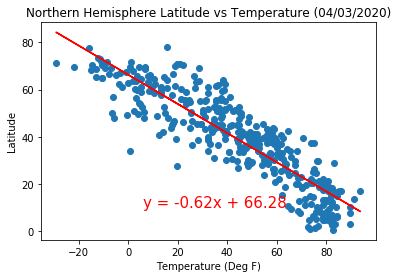

In [27]:
x_values = north_df["Temp"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Temperature ({tme})")
plt.savefig('North_Latitude_vs_Temperature.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

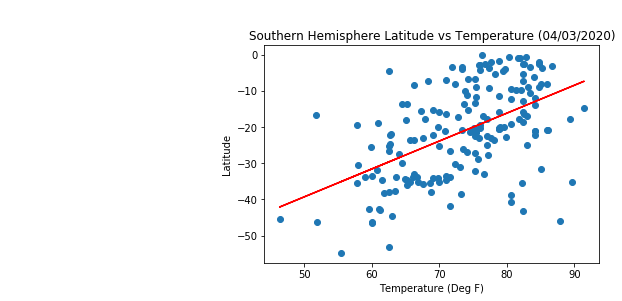

In [28]:
x_values = south_df["Temp"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Temperature ({tme})")
plt.savefig('South_Latitude_vs_Tempature.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

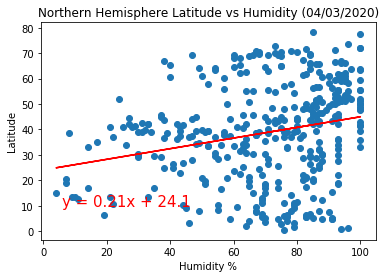

In [29]:
x_values = north_df["Humidity"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Humidity ({tme})")
plt.savefig('North_Latitude_vs_Humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

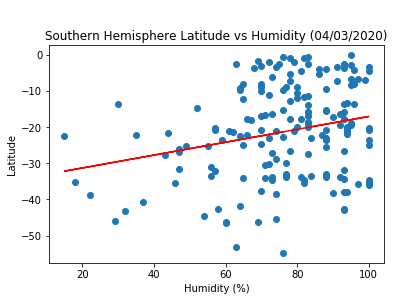

In [30]:
x_values = south_df["Humidity"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Humidity ({tme})")
plt.savefig('South_Latitude_vs_Humidity.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

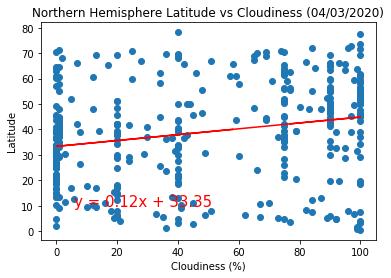

In [31]:
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Cloudiness ({tme})")
plt.savefig('North_Latitude_vs_Cloudiness.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

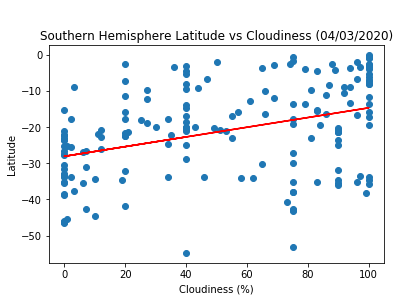

In [32]:
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Cloudiness ({tme})")
plt.savefig('South_Latitude_vs_Cloudiness.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

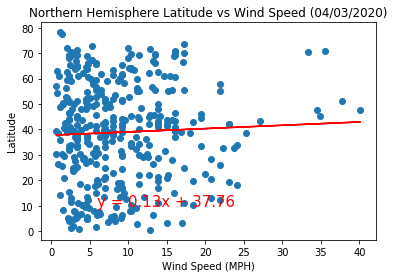

In [33]:
x_values = north_df["Wind_Speed"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Wind Speed ({tme})")
plt.savefig('North_Latitude_vs_Wind.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

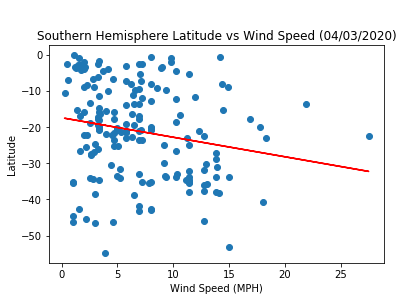

In [34]:
x_values = south_df["Wind_Speed"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Wind Speed ({tme})")
plt.savefig('South_Latitude_vs_Wind.png')
plt.show()
